Q1: K-Fold Cross Validation for Multiple Linear Regression (Least Square Error Fit)  Download the dataset regarding USA House Price Prediction from the following link:  https://drive.google.com/file/d/1O_NwpJT-8xGfU_-3llUl2sgPu0xllOrX/view?usp=sharing  Load the dataset and Implement 5- fold cross validation for multiple linear regression (using least square error fit).  
Steps:  
a. Divide the dataset into input features (all columns except price) and output variable  (price)  
b. 	Scale the values of input features.  
c. 	Divide input and output features into five folds.  
d. 	Run five iterations, in each iteration consider one-fold as test set and remaining four sets as training set. Find the beta (𝛽) matrix, predicted values, and R2_score for each iteration using least square error fit.  
e. 	Use the best value of (𝛽) matrix (for which R2_score is maximum), to train the regressor for 70% of data and test the performance for remaining 30% data. 


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

df = pd.read_csv("USA_Housing.csv")  

X = df.drop("Price", axis=1).values
y = df["Price"].values.reshape(-1, 1)

scaler = StandardScaler()
X = scaler.fit_transform(X)

X = np.c_[np.ones(X.shape[0]), X]

kf = KFold(n_splits=5, shuffle=True, random_state=42)
best_r2, best_beta = -np.inf, None
fold_scores = []

for train_idx, test_idx in kf.split(X):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]
    
    beta = np.linalg.inv(X_train.T @ X_train) @ (X_train.T @ y_train)
    
    y_pred = X_test @ beta
    r2 = r2_score(y_test, y_pred)
    fold_scores.append(r2)
    
    if r2 > best_r2:
        best_r2 = r2
        best_beta = beta

print("R² for each fold:", fold_scores)
print("Best R²:", best_r2)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
y_pred_final = X_test @ best_beta
final_r2 = r2_score(y_test, y_pred_final)

print("Final R² on 30% test data:", final_r2)


R² for each fold: [0.9179971706985147, 0.9145677884802819, 0.9116116385364478, 0.9193091764960818, 0.9243869413350317]
Best R²: 0.9243869413350317
Final R² on 30% test data: 0.9147458156636434


Q2: Concept of Validation set for Multiple Linear Regression (Gradient Descent  Optimization)  
Consider the same dataset of Q1, rather than dividing the dataset into five folds, divide the dataset into training set (56%), validation set (14%), and test set (30%).  
Consider four different values of learning rate i.e. {0.001,0.01,0.1,1}. Compute the values of regression coefficients for each value of learning rate after 1000 iterations.  
For each set of regression coefficients, compute R2_score for validation and test set and find the best value of regression coefficients. 	 


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

df = pd.read_csv("USA_Housing.csv")

X = df.drop("Price", axis=1).values
y = df["Price"].values.reshape(-1, 1)

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.44, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=30/44, random_state=42)

scaler_X = StandardScaler()

X_train = scaler_X.fit_transform(X_train)
X_val = scaler_X.transform(X_val)
X_test = scaler_X.transform(X_test)

def gradient_descent(X, y, alpha, iterations=1000, tol=1e10):
    m, n = X.shape
    X_b = np.c_[np.ones((m, 1)), X]
    beta = np.zeros((n + 1, 1))

    for _ in range(iterations):
        gradients = (2/m) * X_b.T.dot(X_b.dot(beta) - y)
        beta -= alpha * gradients

        if np.any(np.abs(beta) > tol):
            return None  
    return beta

def predict(X, beta):
    m = X.shape[0]
    X_b = np.c_[np.ones((m, 1)), X]
    return X_b.dot(beta)

alphas = [0.001, 0.01, 0.1, 1]
results = {}

for alpha in alphas:
    beta = gradient_descent(X_train, y_train, alpha, iterations=1000)

    if beta is None:
        results[alpha] = {
            "Beta": None,
            "R2_Validation": "Diverged",
            "R2_Test": "Diverged"
        }
        continue

    y_val_pred = predict(X_val, beta)
    y_test_pred = predict(X_test, beta)

    r2_val = r2_score(y_val, y_val_pred)
    r2_test = r2_score(y_test, y_test_pred)

    results[alpha] = {
        "Beta": beta.flatten(),
        "R2_Validation": r2_val,
        "R2_Test": r2_test
    }

for alpha, res in results.items():
    print(f"\nLearning Rate = {alpha}")
    print(f"R2 (Validation): {res['R2_Validation']}")
    print(f"R2 (Test): {res['R2_Test']}")



Learning Rate = 0.001
R2 (Validation): 0.6568256939761279
R2 (Test): 0.6646163859334762

Learning Rate = 0.01
R2 (Validation): 0.9199648370845457
R2 (Test): 0.913449350741349

Learning Rate = 0.1
R2 (Validation): 0.9199649194854793
R2 (Test): 0.9134494051887397

Learning Rate = 1
R2 (Validation): Diverged
R2 (Test): Diverged


Q3: Pre-processing and Multiple Linear Regression  
Download the dataset regarding Car Price Prediction from the following link:  https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data  
1.	Load the dataset with following column names ["symboling", "normalized_losses",  
"make", "fuel_type", "aspiration","num_doors", "body_style", "drive_wheels",  
"engine_location", "wheel_base", "length", "width", "height", "curb_weight",  
"engine_type", "num_cylinders", "engine_size", "fuel_system", "bore", "stroke",  "compression_ratio", "horsepower", "peak_rpm", "city_mpg", "highway_mpg", "price"]  and replace all ? values with NaN  
2.	Replace all NaN values with central tendency imputation. Drop the rows with NaN  values in price column  
3.	There are 10 columns in the dataset with non-numeric values. Convert these values to  numeric values using following scheme:  
(i)	For “num_doors” and “num_cylinders”: convert words (number names) to figures  for e.g., two to 2  
(ii)	For "body_style", "drive_wheels": use dummy encoding scheme  
(iii)	For “make”, “aspiration”, “engine_location”,fuel_type: use label encoding  scheme  
(iv)	For fuel_system: replace values containing string pfi to 1 else all values to 0.  
(v)	For engine_type: replace values containing string ohc to 1 else all values to 0.  
4.	Divide the dataset into input features (all columns except price) and output variable  (price). Scale all input features.  
5.	Train a linear regressor on 70% of data (using inbuilt linear regression function of  Python) and test its performance on remaining 30% of data.  
6.	Reduce the dimensionality of the feature set using inbuilt PCA decomposition and then  again train a linear regressor on 70% of reduced data (using inbuilt linear regression  function of Python). Does it lead to any performance improvement on test set?  



 Q1: Dataset Loaded Successfully
   symboling  normalized_losses         make fuel_type aspiration num_doors  \
0          3                NaN  alfa-romero       gas        std       two   
1          3                NaN  alfa-romero       gas        std       two   
2          1                NaN  alfa-romero       gas        std       two   
3          2              164.0         audi       gas        std      four   
4          2              164.0         audi       gas        std      four   

    body_style drive_wheels engine_location  wheel_base  ...  engine_size  \
0  convertible          rwd           front        88.6  ...          130   
1  convertible          rwd           front        88.6  ...          130   
2    hatchback          rwd           front        94.5  ...          152   
3        sedan          fwd           front        99.8  ...          109   
4        sedan          4wd           front        99.4  ...          136   

   fuel_system  bore  stroke

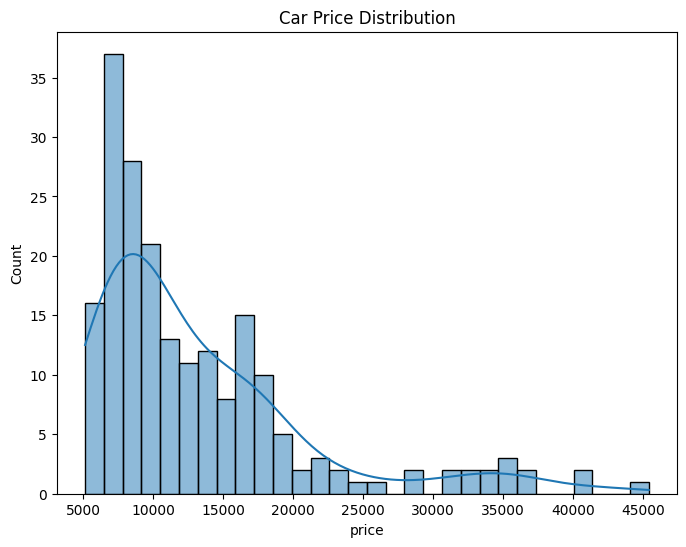

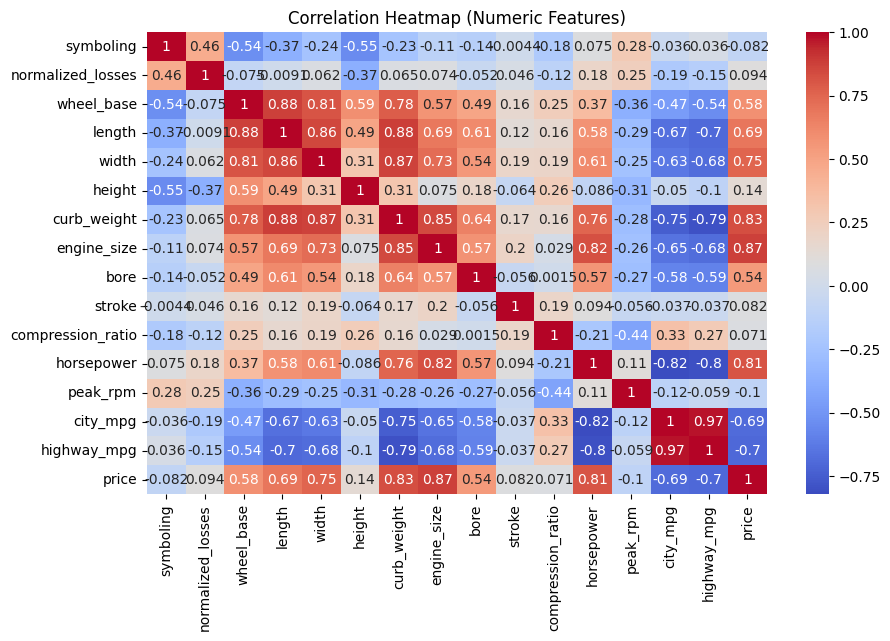


 Q3: EDA done (Distribution + Correlation Heatmap)

 Q4: Features & Target separated

 Q5: Preprocessing pipeline created

 Linear Regression Results
Mean Squared Error: 10883796.74
R² Score: 0.91

 Decision Tree Results
Mean Squared Error: 8583124.56
R² Score: 0.93

 Random Forest Results
Mean Squared Error: 8841949.25
R² Score: 0.93


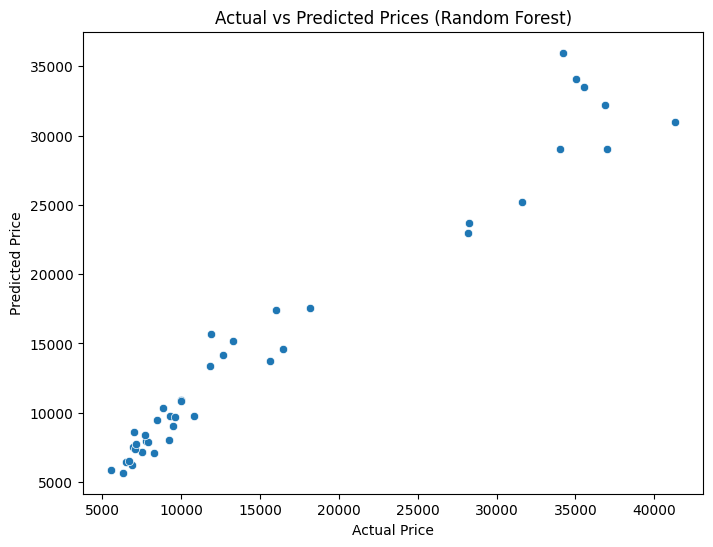


 Q6: Model training, evaluation & visualization complete


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


# 1. DATA SET LOADED
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data"
columns = [
    "symboling", "normalized_losses", "make", "fuel_type", "aspiration",
    "num_doors", "body_style", "drive_wheels", "engine_location",
    "wheel_base", "length", "width", "height", "curb_weight",
    "engine_type", "num_cylinders", "engine_size", "fuel_system",
    "bore", "stroke", "compression_ratio", "horsepower", "peak_rpm",
    "city_mpg", "highway_mpg", "price"
]

df = pd.read_csv(url, names=columns, na_values="?")
print("\n Q1: Dataset Loaded Successfully")
print(df.head()) 
df.to_csv("imports-85.csv", index=False)
print("Files saved successfully!")

df = df.dropna(subset=["price"]) 
df.fillna(df.median(numeric_only=True), inplace=True)
df.fillna(df.mode().iloc[0], inplace=True)

print("\n Q2: Missing values handled")
print(df.isnull().sum())

plt.figure(figsize=(8,6))
sns.histplot(df["price"].astype(float), bins=30, kde=True)
plt.title("Car Price Distribution")
plt.show()

plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()

print("\n Q3: EDA done (Distribution + Correlation Heatmap)")


X = df.drop("price", axis=1)
y = df["price"].astype(float)

print("\n Q4: Features & Target separated")


numeric_cols = X.select_dtypes(include=["int64", "float64"]).columns
categorical_cols = X.select_dtypes(include=["object"]).columns

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_cols),
        ("cat", OneHotEncoder(drop="first", sparse_output=False), categorical_cols)
    ]
)

print("\n Q5: Preprocessing pipeline created")


models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42)
}

results = {}

for name, model in models.items():
    pipeline = Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("model", model)
    ])
    
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )
    
    pipeline.fit(X_train, y_train)
    
    y_pred = pipeline.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    results[name] = {"MSE": mse, "R²": r2}
    print(f"\n {name} Results")
    print(f"Mean Squared Error: {mse:.2f}")
    print(f"R² Score: {r2:.2f}")


best_model = "Random Forest"
pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", models[best_model])
])
pipeline.fit(X_train, y_train)
y_pred_best = pipeline.predict(X_test)

plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred_best)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(f"Actual vs Predicted Prices ({best_model})")
plt.show()

print("\n Q6: Model training, evaluation & visualization complete")
